In [1]:
import gym
import gym_crumb
from agent.agent_TRPO import TRPOAgent

In [2]:
import matplotlib.pyplot as plt
import os
if os.environ.get("DISPLAY") is str and len(os.environ.get("DISPLAY"))!=0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [3]:
env = gym.make("crumb-synthetic-v0")
agent = TRPOAgent(env)

/home/airan/ISA/ros-rl/TRPOagent/network/network.py:59: UserWarning: The parameter 'updates' of theano.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (theano.compat.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  self.load_flat_weights = theano.function([flat_weights_placeholder], updates=dict(zip(self.weights, assigns)))


In [11]:
rewards, i = agent.learn(reward=250, max_pathlength=100, n_timesteps=20000)


********** Iteration 1 ************
Rollout
Made rollout
Total number of episodes:                 886
Average sum of rewards per episode:       211.41248306997744
Std of rewards per episode:               189.86547921177623
Entropy:                                  -75507.84688782122
KL between old and new distribution:      0.009906132965749654
Surrogate loss:                           -1588822.1516771067

********** Iteration 2 ************
Rollout
Made rollout
Total number of episodes:                 894
Average sum of rewards per episode:       220.06241610738255
Std of rewards per episode:               182.35364953166726
Entropy:                                  -75000.05161847691
KL between old and new distribution:      0.009946999716898323
Surrogate loss:                           -1657430.1496439197

********** Iteration 3 ************
Rollout
Made rollout
Total number of episodes:                 920
Average sum of rewards per episode:       213.99233695652174
Std of rewa

KeyboardInterrupt: 

In [12]:
agent.play(env)

1 ) 0.010000000000000009 [-6.17336491241244, -6.231290192076489, -0.036633159124380955] [ 0.30994547  0.10982039  0.05189512 -0.03663316]
2 ) 0.02999999999999997 [-0.12763614935136047, -0.019739942168008007, -0.2716808915172119] [-0.30513691 -0.23745654 -0.07163506 -0.23504773]
3 ) -0.020000000000000018 [-0.4681330011241604, -0.5756598719961662, -0.15731480297887132] [-0.17570619 -0.34049685 -0.55591993  0.11436609]
4 ) 0.009999999999999953 [-0.5378975867670441, -0.47299201875375585, -0.2386933336377577] [ 0.04537923 -0.06976459  0.10266785 -0.08137853]
5 ) 0.010000000000000009 [-0.5686629788953758, -0.3783267989491994, -0.31218698502600506] [ 0.07157852 -0.03076539  0.09466522 -0.07349365]
6 ) -5 [5.719726796181049, 6.001489833344874, 5.897811585051434] [ 0.1113075   0.00520447  0.09663133 -0.07318674]
7 ) 0.020000000000000018 [4.020253082424769, 4.1620433297268065, 4.745538717475766] [ 1.4487769  -1.69947371 -1.8394465  -1.15227287]
8 ) 0.09000000000000002 [2.6423940755705866, 2.7607

In [12]:
env.aim# = np.array([0.33281451, 0.00062079,  -0.12318514])

array([ 0.33281451,  0.00062079, -0.12318514])

In [12]:
10%5

0

In [49]:
metric = lambda a1, a2: ((a1[0] - a2[0])**2 + (a1[1] - a2[1])**2 + (a1[2] - a2[2])**2)**(1/2)

In [18]:
obs = env.reset()
done = False
reward = 0
l = 0
while done is not True:
    a = agent.act(obs, sample=False)[0]
    for i in range(agent.n_actions):
        obs, r, done = env.step([i, a[i]])
        if done:
            break
    reward += r
    l += 1
    print(l, ')', r, [obs[-3], obs[-2], obs[-1]], a)

1 ) 0.03 [-6.234558022464642, -0.00642987453342435, -0.33936807322223256] [ 0.02964064  0.04862728 -0.00642987 -0.33936807]
2 ) -0.07999999999999996 [5.5495661653399395, 5.400513119828763, 0.31234695592236156] [ 0.48461452 -0.78224643 -0.87624231  0.65171503]
3 ) 0.02999999999999997 [5.181537408449017, 3.7253924875110376, 0.8933359749020333] [ 0.75861507 -0.36802876 -1.67512063  0.58098902]
4 ) -5 [5.0335728653855565, 2.38018913386935, 0.8589275332297958] [ 0.81829896 -0.14796454 -1.34520335 -0.03440844]
5 ) 0.010000000000000009 [4.948966313340918, 1.564883093246379, 0.9121282048708681] [ 0.73877648 -0.08460655 -0.81530604  0.05320067]
6 ) 100.08 [4.7020196734863084, 1.564883093246379, 0.9121282048708681] [ 0.37737205 -0.24694664 -0.41820182  0.11833858]


In [12]:
env.render()

(0.04238851898894165,
 0.02,
 0.0,
 0.03,
 0.02,
 0.03,
 0.02,
 0.03,
 3.170990653145611,
 4.303083131928312,
 0.8115401118244083,
 1.0936635854732482)

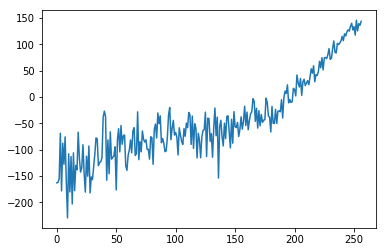

In [5]:
plt.plot(range(i-1), rewards)
plt.show()

In [109]:
env1 = gym.make("crumb-pick-v0")
agent.grasp(env1)
#agent.pick(env1)
#agent.putdown(env1)

ValueError: could not broadcast input array from shape (3) into shape (2)

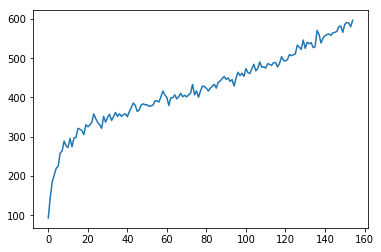

In [9]:
plt.plot(range(min([i,i1,i2,i3])-1), b)
plt.show()

In [10]:
np.mean([i,i1,i2,i3])

191.5

In [12]:
np.mean([i,i1,i2,i3])

110.25